<a href="https://colab.research.google.com/github/MariaJo2211380/TareasCursos20B-2024.2/blob/main/TrabajoClasicaCono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

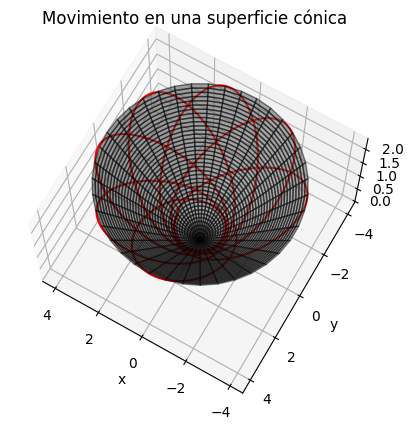

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del sistema
g = 9.8  # aceleración debido a la gravedad
alpha = np.pi / 6  # ángulo del cono
r1 = 1
r2 = 4
m = 1  # masa (puede ser cualquier valor, ya que h es constante)
  # constante del momento angular

# Calcular h^2
h_squared = (2 * g * np.cos(alpha) * (r2 - r1) * (r1**2 * r2**2)) / (np.sin(alpha) * (r2**2 - r1**2))
h = np.sqrt(h_squared)

# Función que describe el sistema de ecuaciones diferenciales
def equations(t, y):
    r, r_dot, phi = y  # y = [r, dr/dt, phi]

    # Ecuaciones diferenciales
    r_ddot = (h**2 * np.sin(alpha)**2) / (m**2 * r**3) - g * np.sin(alpha) * np.cos(alpha)
    phi_dot = h / (m * r**2)

    return [r_dot, r_ddot, phi_dot]

# Condiciones iniciales
x0 = [r1, 0, 0]  # [r, dr/dt, phi]

# Intervalo de tiempo
t_span = (0, 20)
t_eval = np.linspace(0, 20, 1000)

# Resolver las ecuaciones diferenciales
sol = solve_ivp(equations, t_span, x0, t_eval=t_eval)

# Extraer las soluciones
r = sol.y[0]
phi = sol.y[2]
xp = r * np.cos(phi)
yp = r * np.sin(phi)
zp = r * np.tan(alpha)  # Se usa np.tan en lugar de np.cot (cotangente = 1/tan)

# Graficar la superficie cónica
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

phi_mesh, r_mesh = np.meshgrid(np.linspace(0, 2 * np.pi, 40), np.linspace(0, 4, 40))
x_cone = r_mesh * np.cos(phi_mesh)
y_cone = r_mesh * np.sin(phi_mesh)
z_cone = r_mesh * np.tan(alpha)  # Se usa np.tan en lugar de np.cot

ax.plot_surface(x_cone, y_cone, z_cone, color='gray', alpha=0.5, edgecolor='k')

# Graficar la trayectoria
ax.plot(xp, yp, zp, color='red', linewidth=1.5)

# Configurar la vista y las etiquetas
ax.view_init(70, 120)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Movimiento en una superficie cónica')

plt.show()
